In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from tqdm.autonotebook import tqdm
import string

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
df = pd.read_csv('/content/drive/MyDrive/ipl_train_folds_new.csv')
print("the number of rows are {} and the number of columns are {}".format(df.shape[0],df.shape[1]))

the number of rows are 76014 and the number of columns are 16


In [27]:
#removing the unnecessary columns
df = df.drop(['mid','batsman','bowler','runs_last_5','wickets_last_5','striker','non-striker','date'],axis = 1)
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,total,kfold
0,Barabati Stadium,Deccan Chargers,Kolkata Knight Riders,30,0,4.1,126,0
1,Kingsmead,Deccan Chargers,Mumbai Indians,46,0,5.2,168,0
2,"Punjab Cricket Association Stadium, Mohali",Deccan Chargers,Kings XI Punjab,111,2,14.6,175,0
3,New Wanderers Stadium,Kolkata Knight Riders,Delhi Daredevils,62,6,12.4,123,0
4,Kingsmead,Delhi Daredevils,Deccan Chargers,81,3,9.6,173,0


In [28]:
df.info() #we have no nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   venue      76014 non-null  object 
 1   bat_team   76014 non-null  object 
 2   bowl_team  76014 non-null  object 
 3   runs       76014 non-null  int64  
 4   wickets    76014 non-null  int64  
 5   overs      76014 non-null  float64
 6   total      76014 non-null  int64  
 7   kfold      76014 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.6+ MB


Text(0.5, 1.0, 'The stadiums distribution')

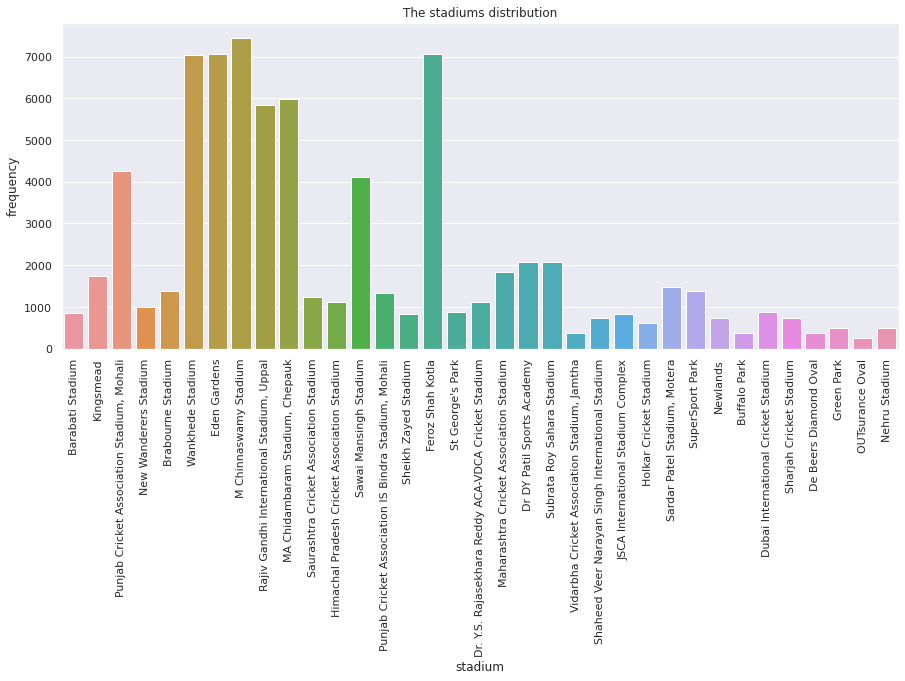

In [35]:
plt.figure(figsize = (15,6))
sns.set(style = 'darkgrid')
sns.countplot(x = 'venue',
              data = df)
plt.xticks(rotation = 90)
plt.gca().set_ylabel('frequency')
plt.gca().set_xlabel('stadium')
plt.title('The stadiums distribution')

In [39]:
df.bat_team.unique() #there seems to be some old team names 
#deccan chargers is sunrisers now
#delhi daredevils is delhi capitals
#kings x1 is punjab kings
#pune warriors is rising pune supergiants
#kochi and gujarat dont exist anymore

array(['Deccan Chargers', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Chennai Super Kings', 'Kings XI Punjab', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Rajasthan Royals', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kochi Tuskers Kerala', 'Gujarat Lions', 'Rising Pune Supergiant'],
      dtype=object)

In [46]:
df['bat_team'] = df['bat_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
df['bat_team'] = df['bat_team'].replace('Delhi Daredevils', 'Delhi Capitals')
df['bat_team'] = df['bat_team'].replace('Kings XI Punjab', 'Punjab Kings')
df['bat_team'] = df['bat_team'].replace('Pune Warriors', 'Rising Pune Supergiants')
df['bat_team'] = df['bat_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants') #theres one with and without s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [47]:
df = df[(df.bat_team != 'Kochi Tuskers Kerala') & (df.bat_team != 'Gujarat Lions')]

(73412, 8)

In [48]:
df.bat_team.unique()

array(['Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Chennai Super Kings', 'Punjab Kings', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Rising Pune Supergiants'], dtype=object)

Text(0.5, 1.0, 'The teams list')

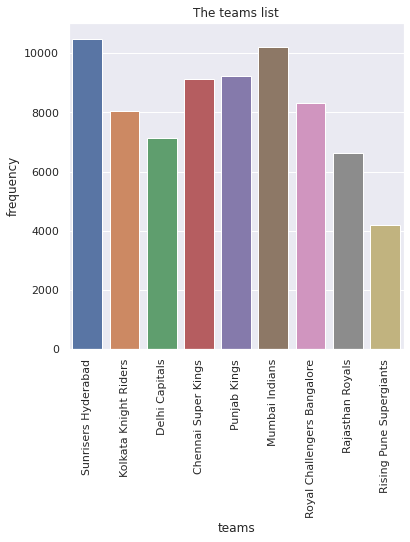

In [50]:
plt.figure(figsize = (6,6))
sns.set(style = 'darkgrid')
sns.countplot(x = 'bat_team',
              data = df)
plt.xticks(rotation = 90)
plt.gca().set_ylabel('frequency')
plt.gca().set_xlabel('teams')
plt.title('The teams list')

In [51]:
df.bowl_team.unique()

array(['Kolkata Knight Riders', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Deccan Chargers', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Chennai Super Kings', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kochi Tuskers Kerala'], dtype=object)

In [52]:
df['bowl_team'] = df['bowl_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
df['bowl_team'] = df['bowl_team'].replace('Delhi Daredevils', 'Delhi Capitals')
df['bowl_team'] = df['bowl_team'].replace('Kings XI Punjab', 'Punjab Kings')
df['bowl_team'] = df['bowl_team'].replace('Pune Warriors', 'Rising Pune Supergiants')
df['bowl_team'] = df['bowl_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants') #theres one with and without s

In [53]:
df = df[(df.bowl_team != 'Kochi Tuskers Kerala') & (df.bowl_team != 'Gujarat Lions')]

Text(0.5, 1.0, 'The teams list')

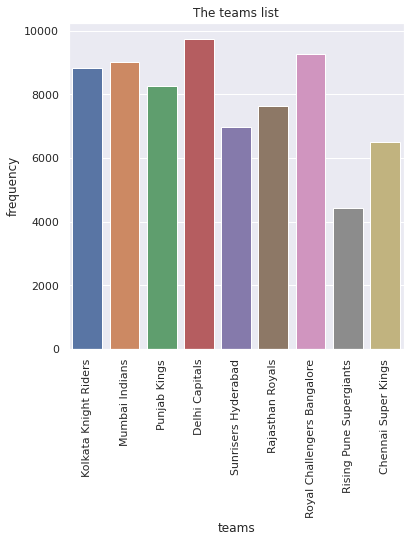

In [54]:
plt.figure(figsize = (6,6))
sns.set(style = 'darkgrid')
sns.countplot(x = 'bowl_team',
              data = df)
plt.xticks(rotation = 90)
plt.gca().set_ylabel('frequency')
plt.gca().set_xlabel('teams')
plt.title('The teams list')

In [55]:
df.shape

(70706, 8)

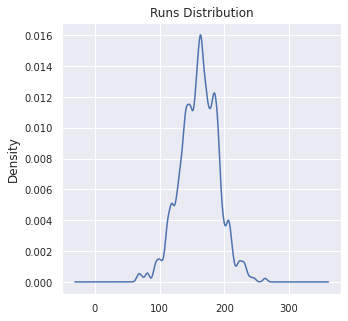

In [58]:
df['total'].plot(kind='density', title = 'Runs Distribution', fontsize = 10, figsize = (5,5)) #looks like a normal distribution ---log normalisation wont be necessary

In [59]:
df.to_csv('processed_df.csv')

In [60]:
from google.colab import files
files.download('processed_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>